In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
np.random.seed(1)
plt.style.use('seaborn')

입력의 특징이 하나인 경우

In [18]:
# set params
n_data = 100
lr = 0.01
t_w, t_b = 5, -3
w, b = np.random.uniform(-3, 3, 2)

In [19]:
w

2.181251127356572

In [20]:
b

1.4827298564231075

In [21]:
x_data = np.random.randn(n_data, )
y_data = t_w*x_data + t_b

In [22]:
x_data

array([-1.09491185,  0.16938243,  0.74055645, -0.9537006 , -0.26621851,
        0.03261455, -1.37311732,  0.31515939,  0.84616065, -0.85951594,
        0.35054598, -1.31228341, -0.03869551, -1.61577235,  1.12141771,
        0.40890054, -0.02461696, -0.77516162,  1.27375593,  1.96710175,
       -1.85798186,  1.23616403,  1.62765075,  0.3380117 , -1.19926803,
        0.86334532, -0.1809203 , -0.60392063, -1.23005814,  0.5505375 ,
        0.79280687, -0.62353073,  0.52057634, -1.14434139,  0.80186103,
        0.0465673 , -0.18656977, -0.10174587,  0.86888616,  0.75041164,
        0.52946532,  0.13770121,  0.07782113,  0.61838026,  0.23249456,
        0.68255141, -0.31011677, -2.43483776,  1.0388246 ,  2.18697965,
        0.44136444, -0.10015523, -0.13644474, -0.11905419,  0.01740941,
       -1.12201873, -0.51709446, -0.99702683,  0.24879916, -0.29664115,
        0.49521132, -0.17470316,  0.98633519,  0.2135339 ,  2.19069973,
       -1.89636092, -0.64691669,  0.90148689,  2.52832571, -0.24

In [23]:
y_data

array([-8.47455923e+00, -2.15308783e+00,  7.02782255e-01, -7.76850301e+00,
       -4.33109253e+00, -2.83692727e+00, -9.86558660e+00, -1.42420304e+00,
        1.23080324e+00, -7.29757970e+00, -1.24727011e+00, -9.56141706e+00,
       -3.19347755e+00, -1.10788618e+01,  2.60708854e+00, -9.55497310e-01,
       -3.12308478e+00, -6.87580810e+00,  3.36877965e+00,  6.83550875e+00,
       -1.22899093e+01,  3.18082015e+00,  5.13825377e+00, -1.30994152e+00,
       -8.99634016e+00,  1.31672659e+00, -3.90460151e+00, -6.01960314e+00,
       -9.15029068e+00, -2.47312520e-01,  9.64034330e-01, -6.11765365e+00,
       -3.97118315e-01, -8.72170695e+00,  1.00930516e+00, -2.76716351e+00,
       -3.93284886e+00, -3.50872936e+00,  1.34443079e+00,  7.52058199e-01,
       -3.52673378e-01, -2.31149395e+00, -2.61089436e+00,  9.19013100e-02,
       -1.83752720e+00,  4.12757034e-01, -4.55058387e+00, -1.51741888e+01,
        2.19412301e+00,  7.93489823e+00, -7.93177782e-01, -3.50077617e+00,
       -3.68222372e+00, -

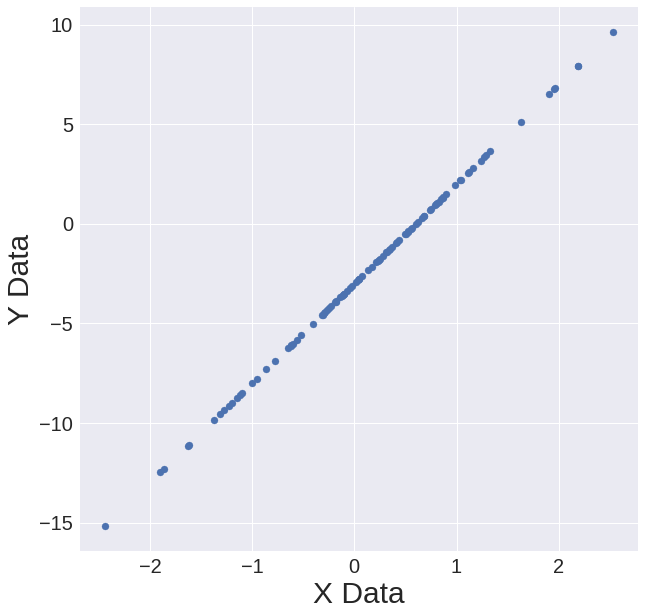

In [24]:
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)
ax.set_xlabel('X Data', fontsize=30)
ax.set_ylabel('Y Data', fontsize=30)
ax.tick_params(labelsize=20)

In [25]:
x_range = np.array([x_data.min(), x_data.max()])

In [26]:
x_range

array([-2.43483776,  2.52832571])

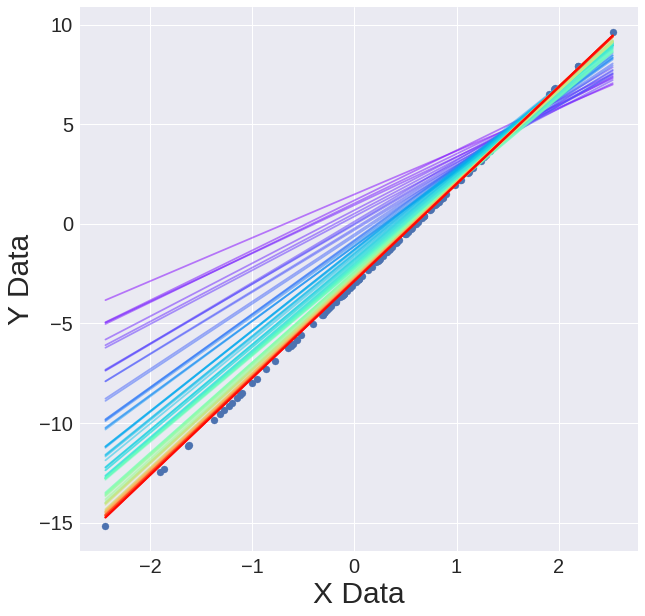

In [27]:
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)
ax.set_xlabel('X Data', fontsize=30)
ax.set_ylabel('Y Data', fontsize=30)
ax.tick_params(labelsize=20)
# set x range for visualization
# train model and visualize updated model
J_track = list()
w_track, b_track = list(), list()
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)
    # visualize updated model
    y_range = w*x_range + b
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)
    # loss calculation
    pred = x*w + b
    J = (y - pred)**2
    J_track.append(J)
    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dw = x
    dpred_db = 1
    # backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db
    w = w - 2*lr*dJ_dw
    b = b - 2*lr*dJ_db

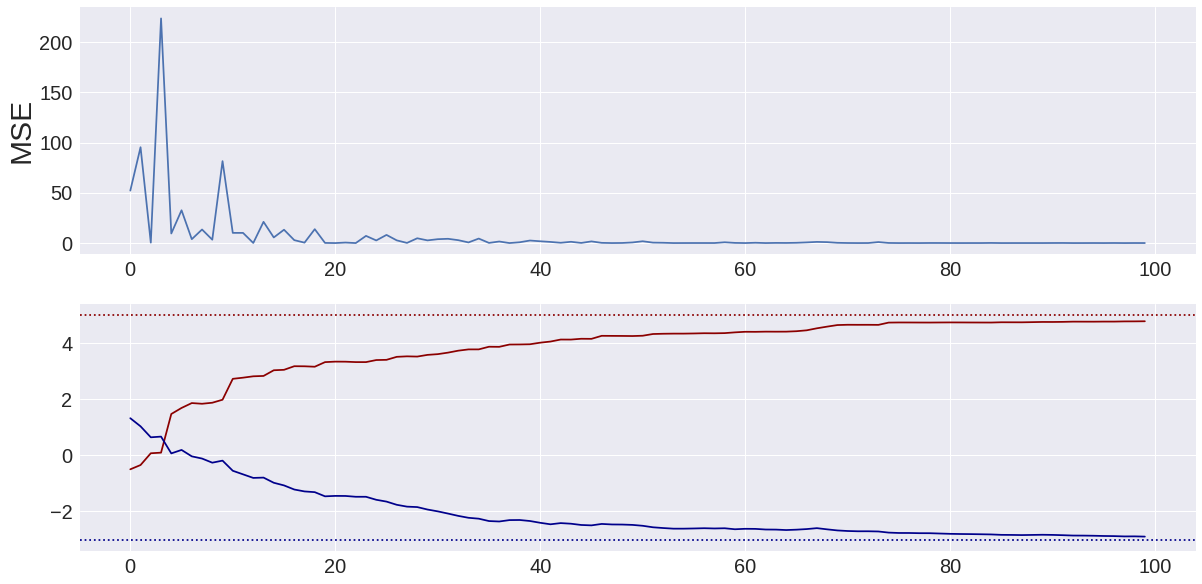

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=20)

입력의 특징이 3개인 경우

In [33]:
# set params
n_data, n_feature = 100, 3
lr = 0.1
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))
W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, ))
# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b

In [36]:
W, b

(array([[ 1.90492419],
        [ 2.52619737],
        [-2.98383558]]), array([-1.31864811]))

In [42]:
J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)
    # forward propagation
    pred = X @ W + b
    J = (y - pred)**2
    J_track.append(J)
    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dW = X.reshape(1, -1)
    dpred_b = 1
    # backpropagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db
    # paramter update
    # print(W.shape, dJ_dW.shape)
    # print(b.shape, dJ_db.shape)
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db
    
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)

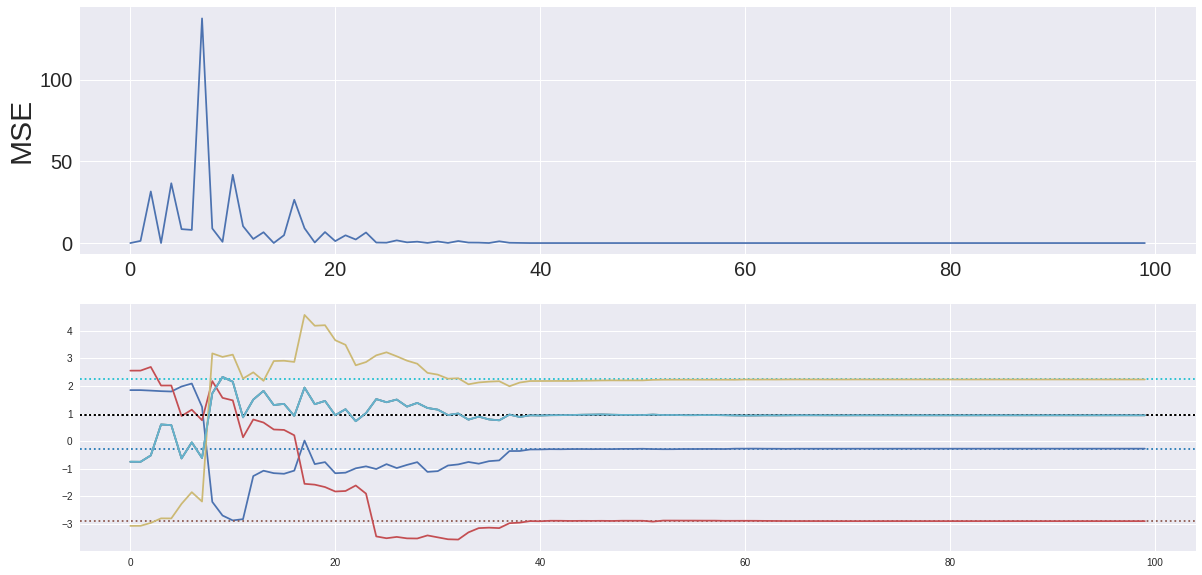

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
cmap = cm.get_cmap('tab10', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
    axes[1].plot(w)
    axes[1].axhline(y=t_b, color='black', linestyle=':')
    axes[1].plot(b_track)
    axes[0].tick_params(labelsize=20)